# Retrievers

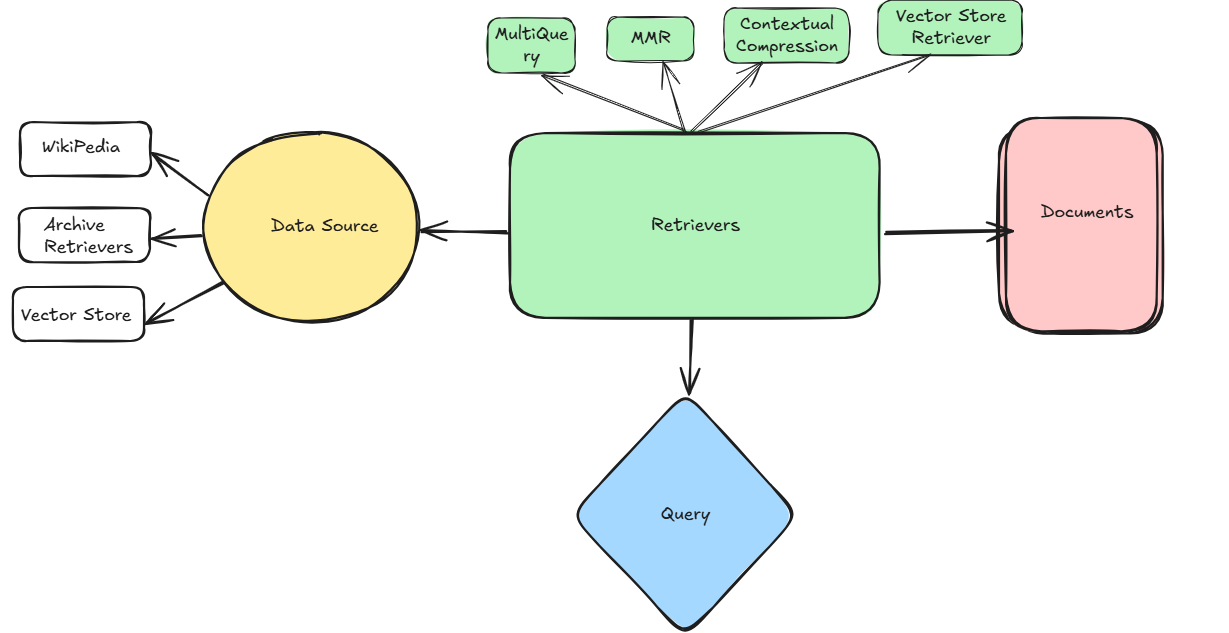
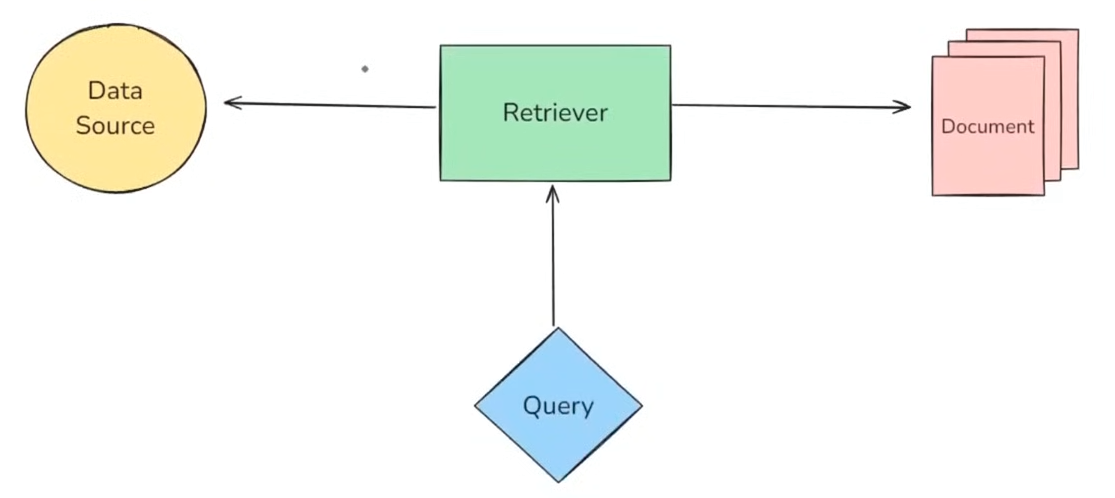

## Wikipedia Retriver

In [1]:
from langchain_community.retrievers import WikipediaRetriever

# Initialize the retriever (optional: set language and top_k)
retriever = WikipediaRetriever(top_k_results=2, lang="en")

In [ ]:
# Define your query
query = "the geopolitical history of india and pakistan from the perspective of a china"

# Get relevant Wikipedia documents
docs = retriever.invoke(query)

In [10]:
docs[1].metadata

{'title': 'India–Pakistan war of 1971',
 'summary': "The India–Pakistan war of 1971, also known as the third Indo-Pakistani war, was a military confrontation between India and Pakistan that occurred during the Bangladesh Liberation War in East Pakistan from 3 December 1971 until the Pakistani capitulation in Dhaka on 16 December 1971.  The war began with Pakistan's Operation Chengiz Khan, consisting of preemptive aerial strikes on eight Indian air stations. The strikes led to India declaring war on Pakistan, marking their entry into the war for East Pakistan's independence, on the side of Bengali nationalist forces. India's entry expanded the existing conflict with Indian and Pakistani forces engaging on both the eastern and western fronts.\nThirteen days after the war started, India achieved a clear upper hand, and the Eastern Command of the Pakistan military signed the instrument of surrender on 16 December 1971 in Dhaka, marking the formation of East Pakistan as the new nation of Ba

In [7]:
print(docs[1].page_content)

The India–Pakistan war of 1971, also known as the third Indo-Pakistani war, was a military confrontation between India and Pakistan that occurred during the Bangladesh Liberation War in East Pakistan from 3 December 1971 until the Pakistani capitulation in Dhaka on 16 December 1971.  The war began with Pakistan's Operation Chengiz Khan, consisting of preemptive aerial strikes on eight Indian air stations. The strikes led to India declaring war on Pakistan, marking their entry into the war for East Pakistan's independence, on the side of Bengali nationalist forces. India's entry expanded the existing conflict with Indian and Pakistani forces engaging on both the eastern and western fronts.
Thirteen days after the war started, India achieved a clear upper hand, and the Eastern Command of the Pakistan military signed the instrument of surrender on 16 December 1971 in Dhaka, marking the formation of East Pakistan as the new nation of Bangladesh. Approximately 93,000 Pakistani servicemen we

In [18]:
for doc in docs:
    print(doc.metadata)
    print(doc.metadata['source'])

{'title': 'India–Pakistan war of 1965', 'summary': "The India–Pakistan war of 1965, also known as the second India–Pakistan war, was an armed conflict between Pakistan and India that took place from August 1965 to September 1965.\nThe conflict began following Pakistan's unsuccessful Operation Gibraltar, which was designed to infiltrate forces into Jammu and Kashmir to precipitate an insurgency against Indian rule. The seventeen day war caused thousands of casualties on both sides and witnessed the largest engagement of armoured vehicles and the largest tank battle since World War II. Hostilities between the two countries ended after a ceasefire was declared through UNSC Resolution 211 following a diplomatic intervention by the Soviet Union and the United States, and the subsequent issuance of the Tashkent Declaration. Much of the war was fought by the countries' land forces in Kashmir and along the border between India and Pakistan. This war saw the largest amassing of troops in Kashmi

## Vector Store

In [ ]:
from langchain_chroma import Chroma
from langchain_huggingface import HuggingFaceEmbeddings, embeddings

hf_embeddings = HuggingFaceEmbeddings(
        model_name="sentence-transformers/all-MiniLM-L6-v2",
        model_kwargs={"device": "'cuda'"}
    ) 

vectorstore = Chroma(
    persist_directory="my_chroma_db",
    embedding_function=hf_embeddings,
    collection_name="sample"
)

In [13]:
vectorstore.get(include=['embeddings','documents', 'metadatas'])

{'ids': ['e9851729-4def-49ab-8d91-6dff1f0de97d',
  'c8590840-3c64-4d3d-a7de-5c41eaddf66a',
  'cd667cb3-d609-47c8-a4c0-c9a5ea9958f7',
  'e629abfe-9ab7-4bdd-bd83-fd9243ec770c',
  '7ea6f0e6-7ac2-4ed8-bde3-2ccd1e41ab4e'],
 'embeddings': array([[ 0.00994725,  0.0691433 , -0.0514712 , ..., -0.03543341,
          0.01284809,  0.01248289],
        [ 0.00127746,  0.03129849, -0.02375378, ..., -0.00518363,
         -0.03280615,  0.02737718],
        [-0.10265911,  0.02650811,  0.02271506, ..., -0.03359749,
         -0.07984943, -0.01507711],
        [ 0.02123394, -0.02468549, -0.04494366, ..., -0.1099581 ,
          0.0057256 ,  0.09915379],
        [ 0.01873979,  0.04382843, -0.0430425 , ..., -0.07801619,
         -0.07840686, -0.00304195]], shape=(5, 384)),
 'documents': ['Virat Kohli is one of the most successful and consistent batsmen in IPL history. Known for his aggressive batting style and fitness, he has led the Royal Challengers Bangalore in multiple seasons.',
  "Rohit Sharma is the mo

In [14]:
#as retriever
retriever = vectorstore.as_retriever(search_kwargs={"k": 2})

In [15]:
retriever

VectorStoreRetriever(tags=['Chroma', 'HuggingFaceEmbeddings'], vectorstore=<langchain_chroma.vectorstores.Chroma object at 0x0000015429502AD0>, search_kwargs={'k': 2})

In [16]:
retriever.invoke("Who is a bowler?")

[Document(id='e629abfe-9ab7-4bdd-bd83-fd9243ec770c', metadata={'team': 'Mumbai Indians'}, page_content='Jasprit Bumrah is considered one of the best fast bowlers in T20 cricket. Playing for Mumbai Indians, he is known for his yorkers and death-over expertise.'),
 Document(id='7ea6f0e6-7ac2-4ed8-bde3-2ccd1e41ab4e', metadata={'team': 'Chennai Super Kings'}, page_content='Ravindra Jadeja is a dynamic all-rounder who contributes with both bat and ball. Representing Chennai Super Kings, his quick fielding and match-winning performances make him a key player.')]

In [17]:
retriever.batch(["Who is a bowler?", "Who is a batsman?"])

[[Document(id='e629abfe-9ab7-4bdd-bd83-fd9243ec770c', metadata={'team': 'Mumbai Indians'}, page_content='Jasprit Bumrah is considered one of the best fast bowlers in T20 cricket. Playing for Mumbai Indians, he is known for his yorkers and death-over expertise.'),
  Document(id='7ea6f0e6-7ac2-4ed8-bde3-2ccd1e41ab4e', metadata={'team': 'Chennai Super Kings'}, page_content='Ravindra Jadeja is a dynamic all-rounder who contributes with both bat and ball. Representing Chennai Super Kings, his quick fielding and match-winning performances make him a key player.')],
 [Document(id='7ea6f0e6-7ac2-4ed8-bde3-2ccd1e41ab4e', metadata={'team': 'Chennai Super Kings'}, page_content='Ravindra Jadeja is a dynamic all-rounder who contributes with both bat and ball. Representing Chennai Super Kings, his quick fielding and match-winning performances make him a key player.'),
  Document(id='e9851729-4def-49ab-8d91-6dff1f0de97d', metadata={'team': 'Royal Challengers Bangalore'}, page_content='Virat Kohli is 

In [18]:
for chunk in retriever.stream("Who is a bowler?"):
    print(chunk)

[Document(id='e629abfe-9ab7-4bdd-bd83-fd9243ec770c', metadata={'team': 'Mumbai Indians'}, page_content='Jasprit Bumrah is considered one of the best fast bowlers in T20 cricket. Playing for Mumbai Indians, he is known for his yorkers and death-over expertise.'), Document(id='7ea6f0e6-7ac2-4ed8-bde3-2ccd1e41ab4e', metadata={'team': 'Chennai Super Kings'}, page_content='Ravindra Jadeja is a dynamic all-rounder who contributes with both bat and ball. Representing Chennai Super Kings, his quick fielding and match-winning performances make him a key player.')]


In [23]:
#similarity Search
query  = "who is a bowler?"
results = vectorstore.similarity_search(query, k=2)

In [24]:
for i, doc in enumerate(results):
    print(f"\n--- Result {i+1} ---")
    print(doc.page_content)


--- Result 1 ---
Jasprit Bumrah is considered one of the best fast bowlers in T20 cricket. Playing for Mumbai Indians, he is known for his yorkers and death-over expertise.

--- Result 2 ---
Ravindra Jadeja is a dynamic all-rounder who contributes with both bat and ball. Representing Chennai Super Kings, his quick fielding and match-winning performances make him a key player.


- **Similarity search directly queries the vector store for nearest documents, while a retriever wraps the vector store into a Runnable interface so it can plug into LangChain pipelines and be called with .invoke().**

- **similarity_search() usually uses one fixed similarity method (like cosine similarity), while a retriever lets you switch or configure different retrieval strategies (MMR, filtering, hybrid search, etc.), making it more flexible.**

## MMR ( maximum marginal Releevance)

* Problem with basic Retrival

In [28]:
from langchain_core.documents import Document

documents = [
    Document(page_content="LangChain makes it easy to work with LLMs."),
    Document(page_content="LangChain is used to build LLM based applications."),
    Document(page_content="LangChain is used to build LLM based applications."),
    Document(page_content="Chroma is used to store and search document embeddings."),
    Document(page_content="Embeddings are vector representations of text."),
    Document(page_content="MMR helps you get diverse results when doing similarity search."),
    Document(page_content="LangChain supports Chroma, FAISS, Pinecone, and more.")]

In [ ]:
from langchain_community.vectorstores import FAISS
from langchain_huggingface import HuggingFaceEmbeddings

# 1️⃣ Create embedding model
hf_embeddings = HuggingFaceEmbeddings(
        model_name="sentence-transformers/all-MiniLM-L6-v2",
        model_kwargs={"device": "cuda"}
    )
# 2️⃣ Create FAISS vector store in memory
vectorstore = FAISS.from_documents(documents, hf_embeddings)

In [30]:
query = "What is langchain?" 

**basic retrieval**
- similarity search

In [31]:
retriever = vectorstore.as_retriever(               
    search_kwargs={"k": 4} ) 

results = retriever.invoke(query)
for docs in results:
    print(docs.page_content)

LangChain supports Chroma, FAISS, Pinecone, and more.
LangChain is used to build LLM based applications.
LangChain is used to build LLM based applications.
LangChain makes it easy to work with LLMs.


**MMR serch type**

- mmr ensure that the results/docs are not only relevent to the query but also differ from each other

In [36]:
retriever = vectorstore.as_retriever(
    search_type="mmr",                  
    search_kwargs={"k": 4, "lambda_mult": 0.4} ) # 0 = diverse result ||  1 = similar result
results = retriever.invoke(query)
for docs in results:
    print(docs.page_content)

LangChain supports Chroma, FAISS, Pinecone, and more.
Embeddings are vector representations of text.
LangChain is used to build LLM based applications.
MMR helps you get diverse results when doing similarity search.


## MultiQuery Retriever

Idea Behind MultiQueryRetriever

**User Query:**
- *How can I build a good GenAI application?*

This could actually mean:

- *How do I choose the right LLM?*
- *How do I implement RAG in my project?*
- *How can I reduce hallucinations in LLMs?*
- *What techniques improve prompt engineering?*

---



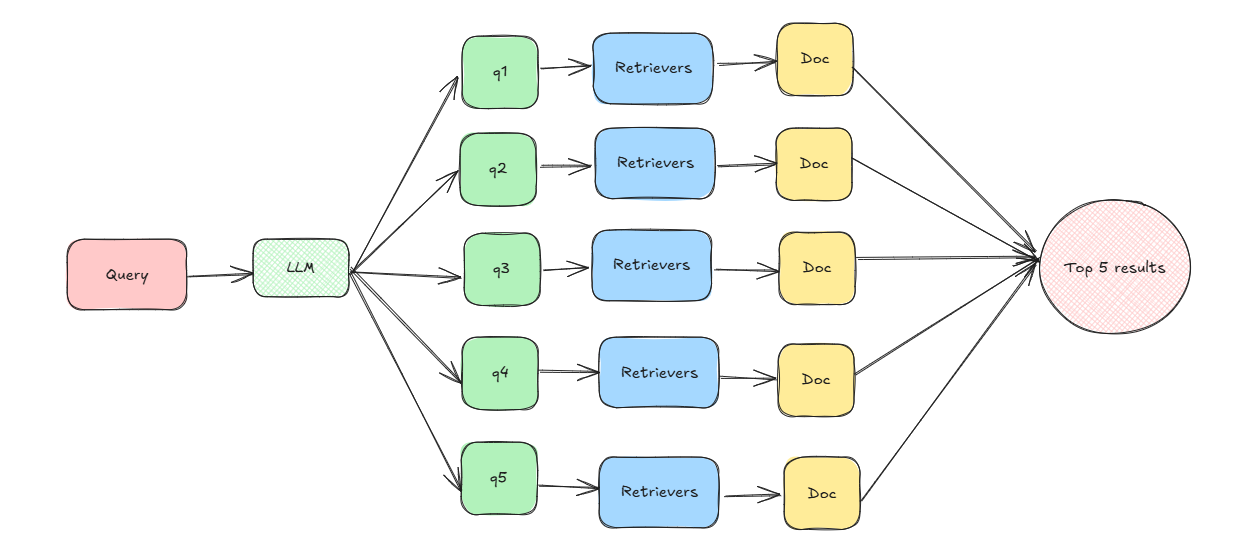

In [58]:
from langchain_community.vectorstores import FAISS
from langchain_huggingface import HuggingFaceEmbeddings
from langchain_core.documents import Document
from langchain_ollama import ChatOllama
from langchain_classic.retrievers.multi_query import MultiQueryRetriever

In [59]:
from langchain_core.documents import Document

all_docs = [
    Document(
        page_content="Regular walking boosts heart health and can reduce symptoms of depression.",
        metadata={"source": "H1", "category": "health"}
    ),
    Document(
        page_content="Consuming leafy greens and fruits helps detox the body and improve longevity.",
        metadata={"source": "H2", "category": "health"}
    ),
    Document(
        page_content="Deep sleep is crucial for cellular repair and emotional regulation.",
        metadata={"source": "H3", "category": "health"}
    ),
    Document(
        page_content="Mindfulness and controlled breathing lower cortisol and improve mental clarity.",
        metadata={"source": "H4", "category": "health"}
    ),
    Document(
        page_content="Drinking sufficient water throughout the day helps maintain metabolism and energy.",
        metadata={"source": "H5", "category": "health"}
    ),
    Document(
        page_content="The solar energy system in modern homes helps balance electricity demand.",
        metadata={"source": "I1", "category": "solar energy"}
    ),
    Document(
        page_content="Python balances readability with power, making it a popular system design language.",
        metadata={"source": "I2", "category": "technology"}
    ),
    Document(
        page_content="Photosynthesis enables plants to produce energy by converting sunlight.",
        metadata={"source": "I3", "category": "biology"}
    ),
    Document(
        page_content="The 2022 FIFA World Cup was held in Qatar and drew global energy and excitement.",
        metadata={"source": "I4", "category": "sports"}
    ),
    Document(
        page_content="Black holes bend spacetime and store immense gravitational energy.",
        metadata={"source": "I5", "category": "physics"}
    ),
]

In [60]:
# 1️⃣ Create embedding model
hf_embeddings = HuggingFaceEmbeddings(
        model_name="sentence-transformers/all-MiniLM-L6-v2",
        model_kwargs={"device": "cuda"}
    )
# 2️⃣ Create FAISS vector store in memory
vectorstore = FAISS.from_documents(all_docs, hf_embeddings)

In [61]:
# Create retrievers
similarity_retriever = vectorstore.as_retriever(search_type="similarity", search_kwargs={"k": 5})

In [62]:
multiquery_retriever = MultiQueryRetriever.from_llm(
    retriever=vectorstore.as_retriever(search_kwargs={"k": 1}),
    llm=ChatOllama(model="qwen3:latest")
)

In [63]:
# Query
query = "How to improve energy levels and maintain balance?"

In [64]:
# Retrieve results
similarity_results = similarity_retriever.invoke(query)
for i, doc in enumerate(similarity_results):
    print(f"\n--- Result {i+1} ---")
    print(doc.page_content , "--" , doc.metadata['category'])



--- Result 1 ---
Drinking sufficient water throughout the day helps maintain metabolism and energy. -- health

--- Result 2 ---
The solar energy system in modern homes helps balance electricity demand. -- solar energy

--- Result 3 ---
Consuming leafy greens and fruits helps detox the body and improve longevity. -- health

--- Result 4 ---
Mindfulness and controlled breathing lower cortisol and improve mental clarity. -- health

--- Result 5 ---
Photosynthesis enables plants to produce energy by converting sunlight. -- biology


In [65]:
multiquery_results = multiquery_retriever.invoke(query)

In [66]:
for i, doc in enumerate(multiquery_results):
    print(f"\n--- Result {i+1} ---")
    print(doc.page_content, "--" , doc.metadata['category'])


--- Result 1 ---
Drinking sufficient water throughout the day helps maintain metabolism and energy. -- health

--- Result 2 ---
Mindfulness and controlled breathing lower cortisol and improve mental clarity. -- health


**generate queries manuall** 

In [67]:
generated_queries = multiquery_retriever.llm_chain.invoke(
    {"question": query}
)
generated_queries

['What dietary strategies can enhance energy levels and promote physical balance?  ',
 'How does regular physical activity contribute to improved energy and overall balance?  ',
 'What stress management techniques can help maintain energy levels and emotional balance?']

In [68]:
# generate  results based on query  
all_results = []

for q in generated_queries:
    docs = vectorstore.similarity_search(q, k=5)
    all_results.extend(docs)
all_results

[Document(id='3f8bcf0c-1aca-4323-8de8-2a8f69e35baa', metadata={'source': 'H5', 'category': 'health'}, page_content='Drinking sufficient water throughout the day helps maintain metabolism and energy.'),
 Document(id='9f3b9329-1e40-4040-91d5-34123769cfad', metadata={'source': 'H2', 'category': 'health'}, page_content='Consuming leafy greens and fruits helps detox the body and improve longevity.'),
 Document(id='eb274e38-4214-471a-8561-14a820416f20', metadata={'source': 'I1', 'category': 'solar energy'}, page_content='The solar energy system in modern homes helps balance electricity demand.'),
 Document(id='c235e109-0222-452a-8d28-1c72092f7255', metadata={'source': 'H1', 'category': 'health'}, page_content='Regular walking boosts heart health and can reduce symptoms of depression.'),
 Document(id='3da40a43-4ab4-4791-bec4-18becb8eb42e', metadata={'source': 'I3', 'category': 'biology'}, page_content='Photosynthesis enables plants to produce energy by converting sunlight.'),
 Document(id='c2

In [69]:
len(all_results)

15

In [70]:
#printing all results
for doc in all_results:
    print(doc.page_content , "--" , doc.metadata['category'])

Drinking sufficient water throughout the day helps maintain metabolism and energy. -- health
Consuming leafy greens and fruits helps detox the body and improve longevity. -- health
The solar energy system in modern homes helps balance electricity demand. -- solar energy
Regular walking boosts heart health and can reduce symptoms of depression. -- health
Photosynthesis enables plants to produce energy by converting sunlight. -- biology
Regular walking boosts heart health and can reduce symptoms of depression. -- health
Drinking sufficient water throughout the day helps maintain metabolism and energy. -- health
The solar energy system in modern homes helps balance electricity demand. -- solar energy
Consuming leafy greens and fruits helps detox the body and improve longevity. -- health
Photosynthesis enables plants to produce energy by converting sunlight. -- biology
Mindfulness and controlled breathing lower cortisol and improve mental clarity. -- health
Drinking sufficient water throug

In [71]:
#extract unique Docs
unique_docs = {doc.page_content: doc for doc in all_results}.values()
unique_docs = list(unique_docs)

for doc in unique_docs:
    print(doc.page_content , "--" , doc.metadata['category'])

Drinking sufficient water throughout the day helps maintain metabolism and energy. -- health
Consuming leafy greens and fruits helps detox the body and improve longevity. -- health
The solar energy system in modern homes helps balance electricity demand. -- solar energy
Regular walking boosts heart health and can reduce symptoms of depression. -- health
Photosynthesis enables plants to produce energy by converting sunlight. -- biology
Mindfulness and controlled breathing lower cortisol and improve mental clarity. -- health
Deep sleep is crucial for cellular repair and emotional regulation. -- health


## ContextualCompressionRetriever

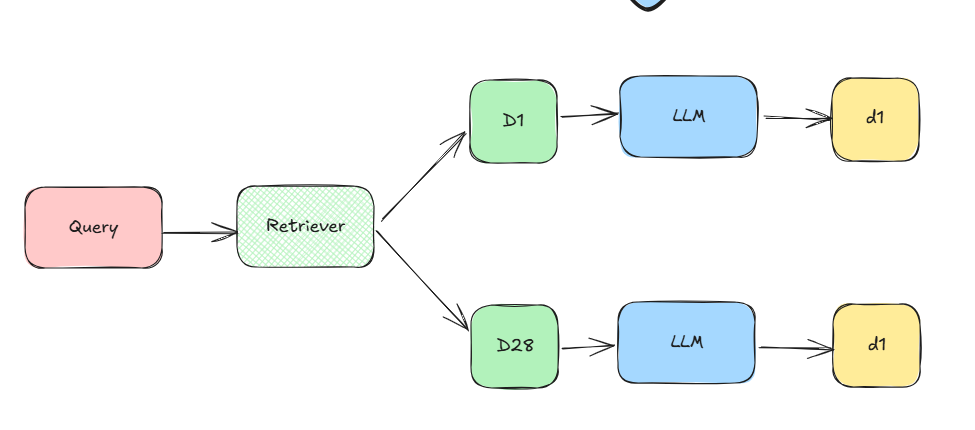

In [50]:
from langchain_community.vectorstores import FAISS
from langchain_huggingface import HuggingFaceEmbeddings
from langchain_core.documents import Document
from langchain_ollama import ChatOllama
from langchain_classic.retrievers.document_compressors import LLMChainExtractor
from langchain_classic.retrievers.contextual_compression import ContextualCompressionRetriever

In [51]:
docs = [
    Document(
        page_content=(
            """The Grand Canyon is one of the most visited natural wonders in the world.
            Photosynthesis is the process by which green plants convert sunlight into energy.
            Millions of tourists travel to see it every year. The rocks date back millions of years."""
        ),
        metadata={"source": "Doc1", "category": "nature"}
    ),

    Document(
        page_content=(
            """In medieval Europe, castles were built primarily for defense.
            The chlorophyll in plant cells captures sunlight during photosynthesis.
            Knights wore armor made of metal. Siege weapons were often used to breach castle walls."""
        ),
        metadata={"source": "Doc2", "category": "history , nature"}
    ),

    Document(
        page_content=(
            """Basketball was invented by Dr. James Naismith in the late 19th century.
            It was originally played with a soccer ball and peach baskets. NBA is now a global league."""
        ),
        metadata={"source": "Doc3", "category": "sports"}
    ),

    Document(
        page_content=(
            """The history of cinema began in the late 1800s. Silent films were the earliest form.
            Thomas Edison was among the pioneers. Photosynthesis does not occur in animal cells.
            Modern filmmaking involves complex CGI and sound design."""
        ),
        metadata={"source": "Doc4", "category": "cinema , nature"}
    )
]

In [52]:
# 1️⃣ Create embedding model
hf_embeddings = HuggingFaceEmbeddings(
        model_name="sentence-transformers/all-MiniLM-L6-v2",
        model_kwargs={"device": "cuda"}
    )
# 2️⃣ Create FAISS vector store in memory
vectorstore = FAISS.from_documents(docs, hf_embeddings)

In [53]:
base_retriever = vectorstore.as_retriever(search_kwargs={"k": 5})

In [54]:
# Set up the compressor using an LLM
llm = ChatOllama(model = "qwen3:latest")
compressor = LLMChainExtractor.from_llm(llm)

In [55]:
# Create the contextual compression retriever
compression_retriever = ContextualCompressionRetriever(
    base_retriever=base_retriever,
    base_compressor=compressor
)

In [56]:
# Query the retriever
query = "What is photosynthesis?"
compressed_results = compression_retriever.invoke(query)

In [57]:
for i, doc in enumerate(compressed_results):
    print(f"\n--- Result {i+1} ---")
    print(doc.page_content , '--' ,doc.metadata['category'])



--- Result 1 ---
Photosynthesis is the process by which green plants convert sunlight into energy. -- nature

--- Result 2 ---
The chlorophyll in plant cells captures sunlight during photosynthesis. -- history , nature

--- Result 3 ---
Photosynthesis does not occur in animal cells. -- cinema , nature
